In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 

In [3]:
result_path = "../../preprocessing/preprocessed_data/april"
memilio_id = 1

In [4]:
df = pd.read_csv(f"{result_path}/substances/{memilio_id}_output.csv")
df = df.loc[df.simulation_id == 1].drop(columns=["simulation_id"])

In [5]:
df.head()

,time_in_minutes,variable,value,manhole,time_in_days
0,15,COV19,19.59216,MUC012,0.010417
1,30,COV19,19.71592,MUC012,0.020833
2,45,COV19,19.83924,MUC012,0.031250
3,60,COV19,19.96066,MUC012,0.041667
4,75,COV19,20.13956,MUC012,0.052083


In [6]:
df.manhole.unique()

array(['MUC012', 'MUC060', 'MUC112', 'MUC348', 'MUC362', 'MUC434',
       'MUC494', 'MUC560', 'MUC562', 'MUC586', 'MUC600', 'MUC608'],
      dtype=object)

In [7]:
manhole_names

{'MUC012': 'Am Langwieder Bach',
 'MUC060': 'Gräfelfinger Str.',
 'MUC362': 'Schenkendorfstr.',
 'MUC348': 'Schmidbartlanger',
 'MUC494': 'Savitstr.',
 'MUC608': 'Gyßlinger Becken',
 'MUC600': 'Leopoldstr.',
 'MUC112': 'Botanischer Garten',
 'MUC560': 'Wintersteinstr.',
 'MUC434': 'WWT Gut Großlappen',
 'MUC562': 'WWT Gut Marienhof',
 'MUC586': 'Gesamt'}

/tmp/ipykernel_35647/3376572914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)


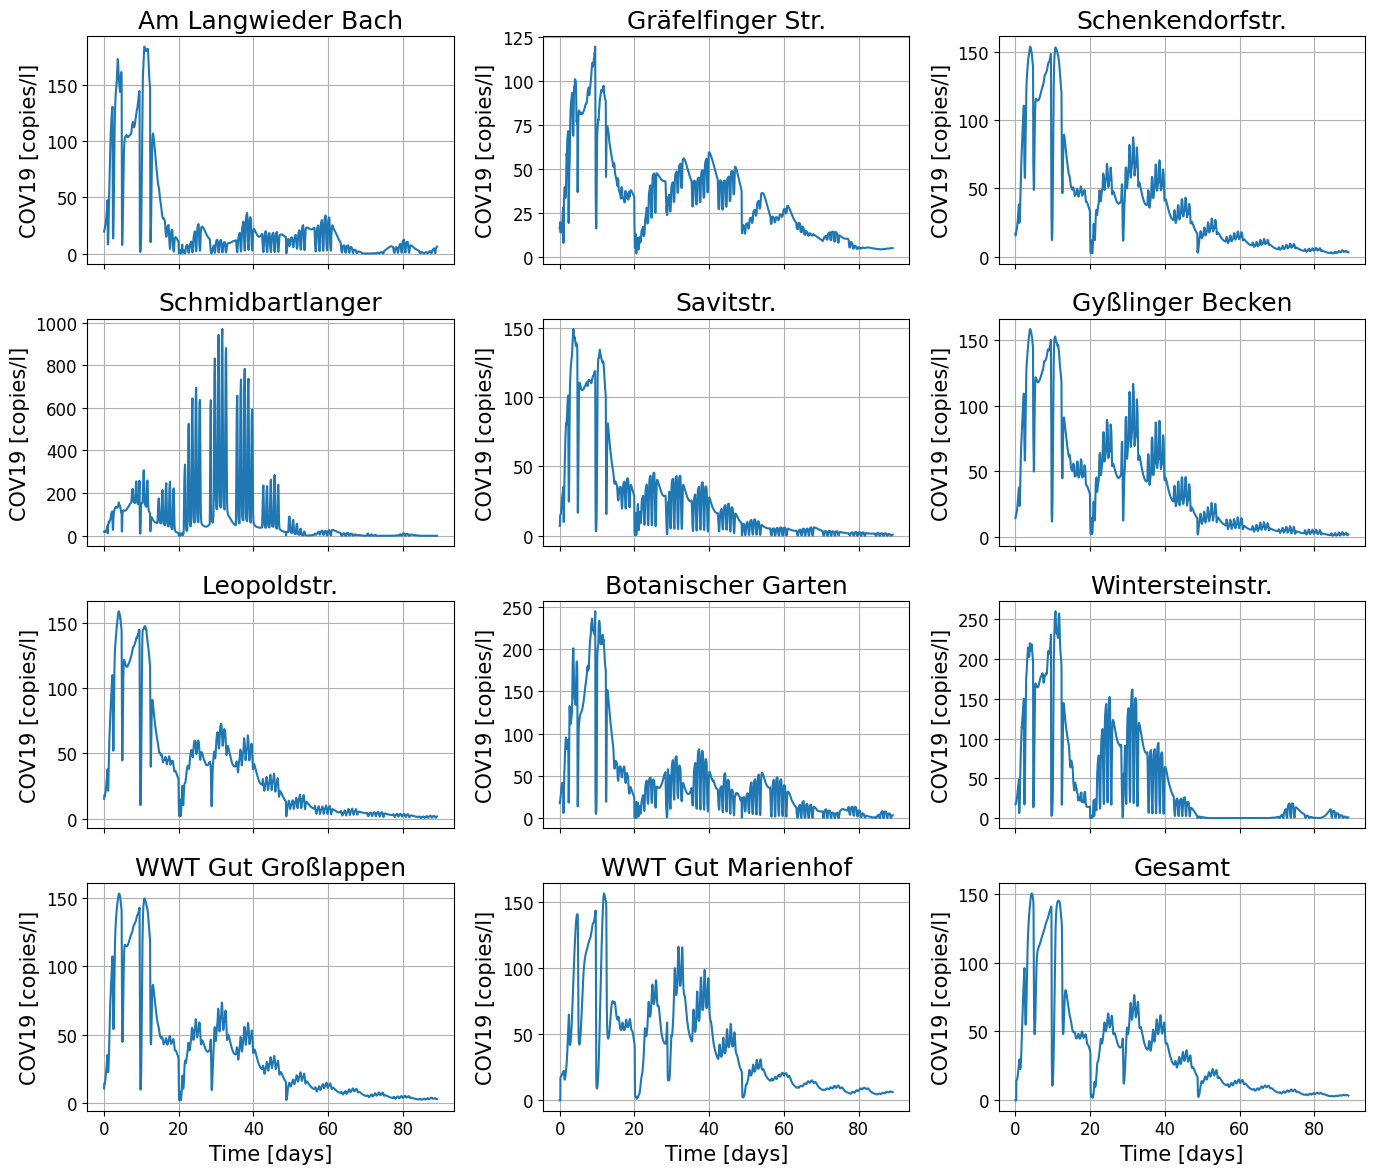

In [8]:
# Filter data
covid_df = df[(df["variable"] == "COV19") & (df["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)

# Sort locations for consistency
locations_sorted = list(manhole_names.values())

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12), sharex=True)
axes = axes.flatten()


for i, location in enumerate(locations_sorted, start=0):
    ax = axes[i]
    group = covid_df[covid_df["location"] == location]
    ax.plot(group["time_in_days"], group["value"])
    ax.set_title(location)
    ax.set_ylabel("COV19 [copies/l]")
    ax.grid(True)

# Set x-labels for bottom row only
for ax in axes[-3:]:
    ax.set_xlabel("Time [days]")

# Add overall title
plt.tight_layout()
plt.show()


/tmp/ipykernel_35647/3893138075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)


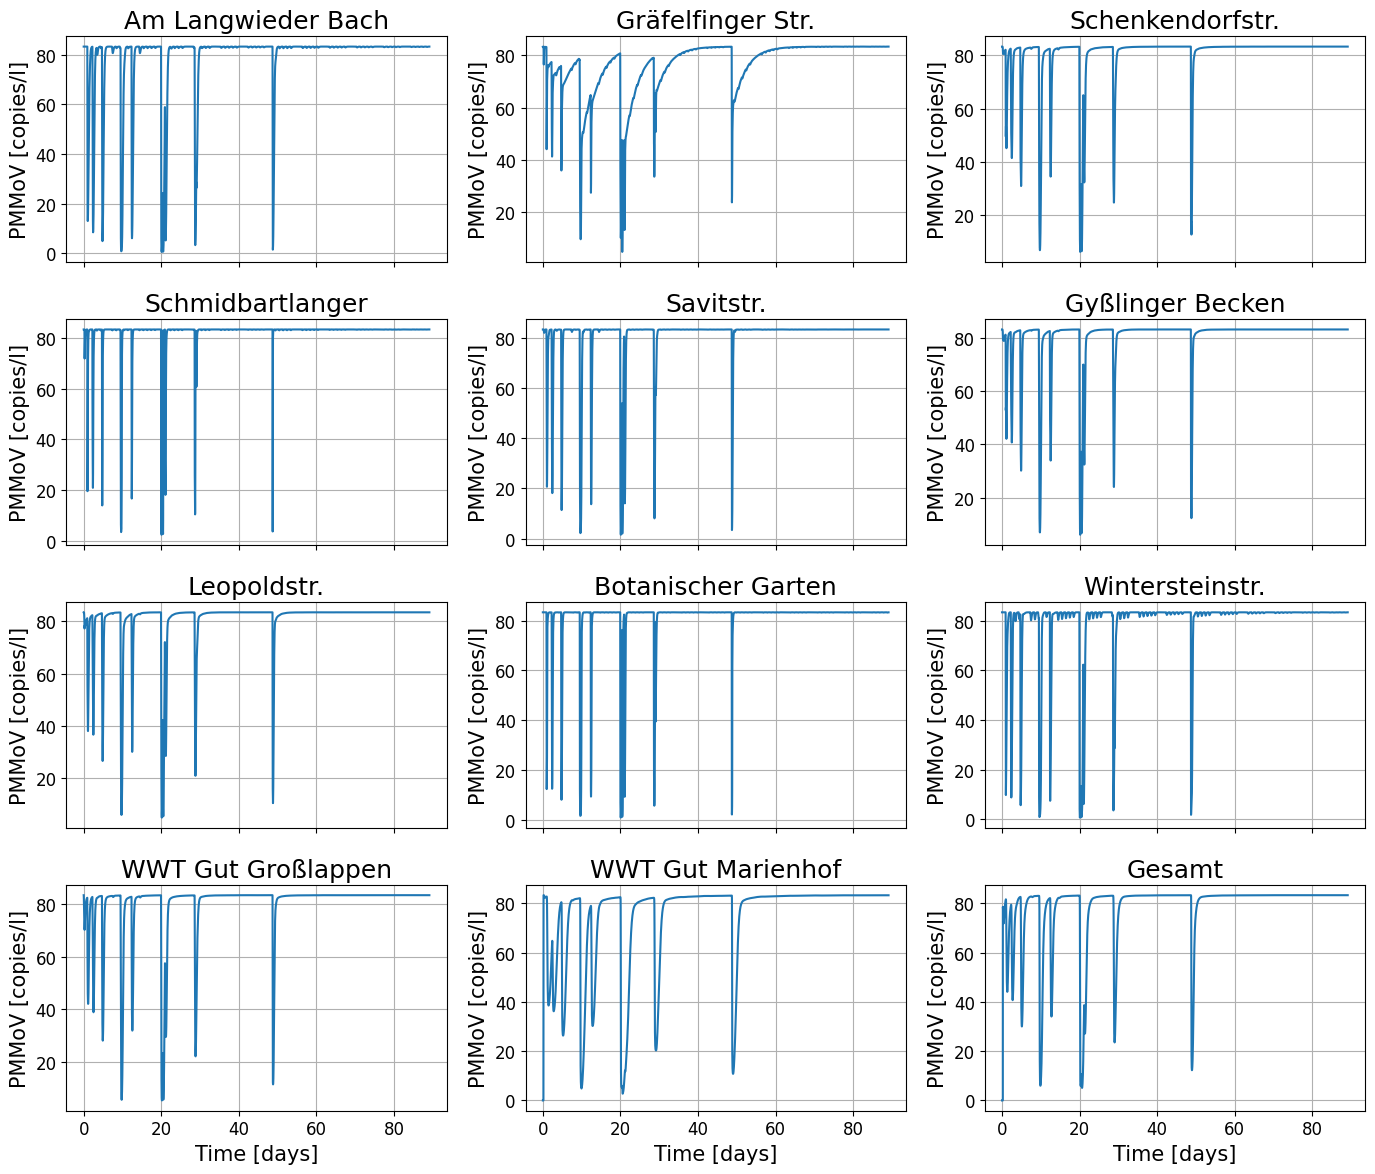

In [10]:
# Filter data
covid_df = df[(df["variable"] == "PMMoV") & (df["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)

# Sort locations for consistency
locations_sorted = list(manhole_names.values())

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12), sharex=True)
axes = axes.flatten()

for i, location in enumerate(locations_sorted, start=0):
    ax = axes[i]
    group = covid_df[covid_df["location"] == location]
    ax.plot(group["time_in_days"], group["value"])
    ax.set_title(location)
    ax.set_ylabel("PMMoV [copies/l]")
    ax.grid(True)

# Set x-labels for bottom row only
for ax in axes[-3:]:
    ax.set_xlabel("Time [days]")

# Add overall title
plt.tight_layout()
plt.show()